C:\Users\PREETHI\Music\arunNaan\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
C:\Users\PREETHI\Music\arunNaan\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['priceSqFt']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


Mean Absolute Error: 56880.23
Mean Squared Error: 6368449626.72
Root Mean Squared Error: 79802.57
R² Score: 0.91


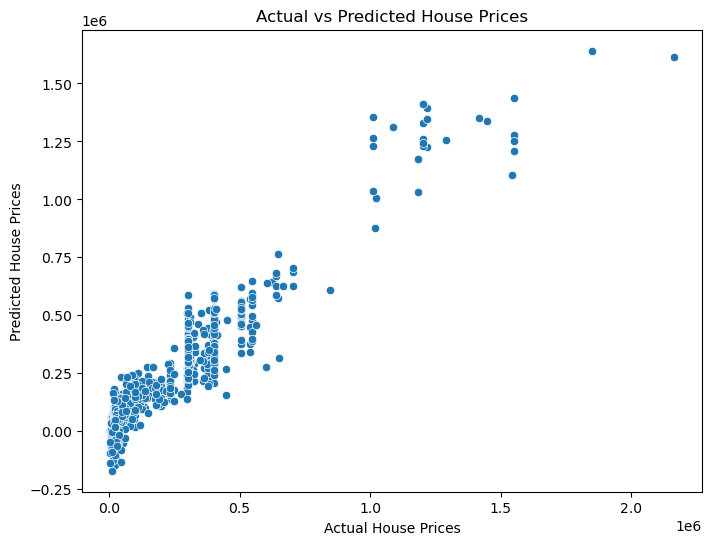

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = "Indian_housing_Delhi_data.csv"
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=['currency', 'verificationDate', 'description', 'Status'])

# Function to clean numerical columns with commas
def clean_numeric(value):
    if isinstance(value, str):
        value = value.replace(',', '').strip()  # Remove commas and extra spaces
        try:
            return float(value)
        except ValueError:
            return np.nan
    return value

# Apply cleaning function to relevant columns
df['price'] = df['price'].apply(clean_numeric)
df['SecurityDeposit'] = df['SecurityDeposit'].apply(clean_numeric)

# Function to clean 'house_size' column
def clean_house_size(value):
    if isinstance(value, str):
        value = value.split()[0]  # Extract numeric part
        value = value.replace(',', '')  # Remove commas
        try:
            return float(value)
        except ValueError:
            return np.nan
    return value

df['house_size'] = df['house_size'].apply(clean_house_size)

# Define features and target variable
X = df.drop(columns=['price'])
y = df['price']

# Identify categorical and numerical columns
categorical_features = ['house_type', 'location', 'city', 'isNegotiable']
numerical_features = ['house_size', 'latitude', 'longitude', 'numBathrooms', 'numBalconies', 'priceSqFt', 'SecurityDeposit']

# **Fix: Handle Missing Values using SimpleImputer**
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Fill NaN with median for numeric columns
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill NaN with mode for categorical columns
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_features),
    ('cat', cat_transformer, categorical_features)
])

# Create pipeline with Linear Regression
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Visualizing predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()
